## 题目：寻找关键用户和分析社交关系

### data.json 数据描述
#### 1. 用户节点数据包含用户ID和他们的"影响力分数"，格式为["用户名称", 影响力分数]。
#### 2. 边关系数据包含每两个用户之间的连接强度（即边的权重），格式为["用户名称1", "用户名称2", 关系权重]。
例如：
- 节点：["Yanyan-Wang", 50.95], ["Aarebecca", 23.82], ...
- 边：["Yanyan-Wang", "Aarebecca", 25.3], ["Yanyan-Wang", "pomelo-nwu", 25.09], ...

### 问题
#### 1. 社交网络构建与分析
- a. 使用邻接矩阵或者字典表示法来表示这个社交关系网络。
- b. 请找出每个用户的直接朋友（即与其存在边关系的节点），并用列表形式列出。

#### 2. 统计与度中心性分析
- a. 计算每个用户的度数（即直接朋友数量），列出度数最多的前5个用户及其朋友数量。
- b. 通过影响力分数（如上所示），找出影响力最高的前5个用户。
- c. 综合考虑影响力分数和朋友数量，列出对社交网络最有影响力的用户（可以选择将两者按一定比例加权，例如影响力得分的50%和朋友数量的50%）。

#### 3. 推荐新朋友
- a. 对于用户 Yanyan-Wang，请找出其“朋友的朋友”中最有可能成为新朋友的用户，并列出推荐的理由（例如有最多共同的朋友）。
- b. 考虑用户之间的连接强度，找出与 Yanyan-Wang 连接强度最高的5个用户（无论是否已经是直接朋友），并列出推荐排序。
 
#### 4. 网络图的可视化
- a. 使用图论可视化工具绘制用户关系网络图，展示关键用户和他们的连接情况。
- b. 你可以对图中的节点按“影响力得分”进行着色，节点的大小则代表度数，尝试解释在图中哪些用户在社交网络中最具影响力。

我先实现一个自己的邻接矩阵实例,用来展示第一问的a

In [1]:
import json

# 一段自己对于邻接矩阵的实现
class Graph_Matrix:
    def __init__(self, vertices={}, vertices_weight={}, matrix=[]):
        self.matrix = matrix
        self.vertices = vertices
        self.vertices_weight = vertices_weight
        self.edge_dict = {}
        self.edges = []
        self.num_edges = 0
        self.num_vertices = max(len(vertices), len(matrix))
        
        if len(matrix) > 0:
            if len(vertices) != matrix:
                raise IndexError
            self.getAllEdges()
            self.num_edges = len(self.edges)
        elif len(vertices) > 0:
            self.matrix = [[0 for col in range(len(vertices))] for row in range(len(vertices))]
            
    
    def isOutRange(self, index=False, name=''):
        if index == False and name == '':
            print('请输入节点')
            
        try:
            if index != False and (index >= self.num_vertices - 1 or index <= 0):
                raise IndexError
            elif name != '' and name not in self.vertices:
                raise IndexError                
        except IndexError:
            print("节点出界")
        
    def isEmpty(self):
        if self.num_edges == 0:
            self.num_edges = len(self.matrix)
        return self.num_edges == 0
    
    def add_vertex(self, key):
        if key not in self.vertices:
            self.vertices[key] = len(self.vertices) + 1

        for i in range(self.getVerticesNumbers()):
            self.matrix[i].append(0)

        self.num_vertices += 1

        nRow = [0] * self.num_vertices
        self.matrix.append(nRow)
    
    def add_edge(self, src, dest, weight=1):
        src1 = src
        dest1 = dest
        if type(src) != 'int':
            if src not in self.vertices:
                self.vertices[src] = self.num_vertices
                self.num_vertices += 1
            src = self.vertices[src]
        if type(dest) != 'int':
            if dest not in self.vertices:
                self.vertices[dest] = self.num_vertices
                self.num_vertices += 1
            dest = self.vertices[dest]
        self.matrix[src][dest] = weight
        self.matrix[dest][src] = weight
        self.num_edges += 2
        self.edges.append([src1, dest1, weight])
        self.edges.append([dest1, src1, weight])
        self.edge_dict[src1, dest1] = weight
        self.edge_dict[dest1, src1] = weight
        
    def getAllEdges(self):
        for i in range(len(self.matrix)):
            for j in range(len(self.matrix)):
                if 0 < self.matrix[i][j] < float('inf'):
                    self.edge_dict[i, j] = self.matrix[i][j]
                    self.edges.append([i, j, self.matrix[i][j]])
        return self.edges
        

fpath = r"D:\Coding\project\myproject\jupyter_notebook\hw4_data.json"
with open(fpath, 'r', encoding='utf-8') as file:
    data = json.load(file)
    d1 = dict()
    d2 = dict()
    index = 0
    for i in data['nodes']:
        d1[i[0]] = index
        d2[i[0]] = i[1]
        index += 1
    graph = Graph_Matrix(vertices=d1, vertices_weight=d2)
    for i in data['edges']:
        graph.add_edge(i[0], i[1], i[2])
    print(graph.matrix)

[[0, 25.3, 25.09, 9.62, 2.1, 0, 0, 0, 0, 1.14, 0, 0, 0.86, 11.85, 7.25, 2.34, 0, 0, 0, 0, 0, 0, 4.25, 4.5, 0, 0, 3.11, 7.39, 3.61, 0, 0], [25.3, 0, 24.84, 6.4, 0.97, 0, 0, 0, 0, 0, 0, 0, 0, 11.92, 6.58, 0, 0, 0, 0, 0, 0, 0, 4.55, 4.84, 0, 0, 3.27, 7.73, 3.82, 0, 0], [25.09, 24.84, 0, 12.48, 3.96, 3.27, 2.52, 2.1, 0, 3.56, 1.5, 0, 4.11, 13.85, 8.1, 3.86, 2.36, 0, 1.33, 1.09, 2.24, 0, 4.66, 4.97, 0, 0, 3.32, 7.63, 3.9, 1, 2.1], [9.62, 6.4, 12.48, 0, 11.87, 9.15, 7.73, 6.96, 6.85, 15.28, 7.93, 6.54, 9.84, 7.15, 4.1, 10.64, 7.32, 2.32, 5.19, 7.84, 5.09, 3.51, 3.21, 3.35, 4.19, 3.05, 2.51, 3.87, 2.83, 2.84, 2.96], [2.1, 0.97, 3.96, 11.87, 0, 7.62, 5.33, 8.44, 6.84, 6.29, 9.52, 1.51, 6.4, 1.77, 0.89, 5.48, 7.29, 1.2, 6.71, 5.92, 2.84, 1.26, 0.84, 0.85, 1.34, 1.2, 0.78, 0.88, 0.81, 1.09, 0.89], [0, 0, 3.27, 9.15, 7.62, 0, 10.82, 6.14, 3.51, 8.19, 8.83, 0, 13.32, 0, 0, 6.26, 7.06, 0.79, 4.97, 6.92, 6.19, 0, 0, 0, 0, 0, 0, 0, 0, 1.65, 3.69], [0, 0, 2.52, 7.73, 5.33, 10.82, 0, 4.23, 3.07, 7.88, 

之后我将直接用内置的networkx库来创建并使用图

Yanyan-Wang's neighbors include: ['Aarebecca', 'pomelo-nwu', 'yangzy0603', 'tyn1998', 'yvonneyx', 'lidongze0629', 'RackweLLizm', 'yikenie', 'yubo0923', 'Maple0817', 'wj23027', 'frank-zsy', 'andyhuang18', 'bifenglin']
Yanyan-Wang's degree = 14
Aarebecca's neighbors include: ['Yanyan-Wang', 'pomelo-nwu', 'yangzy0603', 'yvonneyx', 'lidongze0629', 'tyn1998', 'RackweLLizm', 'yikenie', 'yubo0923', 'Maple0817', 'frank-zsy']
Aarebecca's degree = 11
pomelo-nwu's neighbors include: ['Yanyan-Wang', 'Aarebecca', 'yangzy0603', 'tyn1998', 'lidongze0629', 'yvonneyx', 'RackweLLizm', 'yikenie', 'bifenglin', 'frank-zsy', 'yubo0923', 'wj23027', 'andyhuang18', 'Maple0817', 'will-ww', 'zhicheng-ning', 'PureNatural', 'xiaoya-yaya', 'xgdyp', 'longyanz', 'Zzzzzhuzhiwei', 'birdflyi', 'lhbvvvvv', 'zhaosj975']
pomelo-nwu's degree = 24
tyn1998's neighbors include: ['andyhuang18', 'pomelo-nwu', 'frank-zsy', 'wj23027', 'bifenglin', 'Yanyan-Wang', 'will-ww', 'Zzzzzhuzhiwei', 'lhbvvvvv', 'zhicheng-ning', 'PureNatural

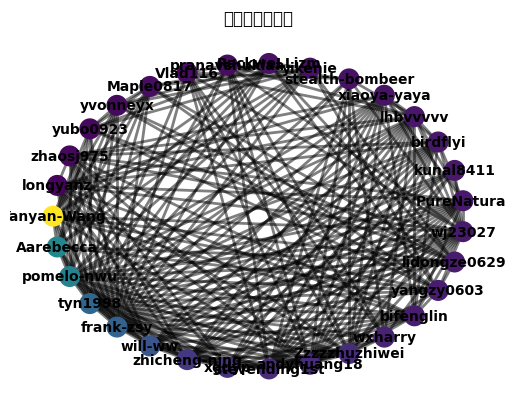

In [2]:
import json
import networkx as nx
import matplotlib.pyplot as plt

fpath = r"D:\Coding\project\myproject\jupyter_notebook\hw4_data.json"
with open(fpath, 'r', encoding='utf-8') as file:
    data = json.load(file)
    G = nx.Graph()
    G.add_nodes_from([(node, {'influence': influence}) for node, influence in data['nodes']])
    G.add_edges_from([(u, v, {'weight': weight}) for u, v, weight in data['edges']])
    for node in G.nodes():
        # 计算每个用户的直接朋友
        print(f"{node}'s neighbors include: {list(G.neighbors(node))}")
        # 计算每个用户的度数
        print(f"{node}'s degree = {G.degree(node)}")
        
    sorted_nodes = sorted(dict(G.degree()).items(), key = lambda item: item[1],reverse=True)
    print([i[0] for i in sorted_nodes[:5]])
    print()
    nodes_ = []
    for node, d in G.nodes(data=True):
        nodes_.append([node, G.degree(node), d['influence']])
    
    sort_nodes_ = sorted(nodes_, key=lambda node:(node[1]+node[2])/2, reverse=True)
    print(sort_nodes_)
    
    Max = -1
    n = ''
    
    l = list(dict(G.adj['Yanyan-Wang']).keys())
    for i in l:
        t = list(dict(G.adj[i]).keys())
        t.remove('Yanyan-Wang')
        for j in t:
            m = list(dict(G.adj[j]).keys())
            if 'Yanyan-Wang' in m:
                m.remove('Yanyan-Wang')
            s1 = set(m)
            s2 = set(l)
            intersection = s1.intersection(s2)
            if len(intersection) > Max:
                n = j
                Max = len(intersection)
    # 推荐理由: 该用户和Yanyan-Wang拥有最多的相同好友
    print(n)
    
    weights_yanyan = []
    for item in dict(G.adj['Yanyan-Wang']).items():
        name = item[0]
        weight = item[1]['weight']
        weights_yanyan.append([name, weight])
    print([i[0] for i in weights_yanyan[:5]])
    attributes = G.nodes(data=True)
    pos = nx.shell_layout(G)
    importance_values = [G.nodes[node]['influence'] for node in G.nodes()] 
    max_importance = max(importance_values) if importance_values else 0 
    normalized_importance = [v / max_importance for v in importance_values]  
    node_color_dict = {node: plt.cm.viridis(G.nodes[node]['influence'] / max_importance) for node in G.nodes()} 
    node_colors = [node_color_dict[node] for node in G.nodes()]
    nx.draw_networkx_nodes(G, pos, node_size=200, node_color=node_colors)  
    nx.draw_networkx_edges(G, pos, width=2, alpha=0.5)  
    nx.draw_networkx_labels(G, pos, font_size=10, font_weight='bold')  
    plt.title('用户关系网络图')
    plt.axis('off')
    plt.show()